## Métricas de rendimiento en clasificación

En este libro vamos a practicar los principales métricas de evaluación del rendimiento de modelos de clasificación. De forma más precisa, veremos cómo calcular la exactitud, la precisión, el recall o el F1-score. Además, veremos la forma de calcular las curvas ROC y el área bajo la curva. 

Antes de eso, vamos a importar las siguientes librerías: 

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

A continuación, importamos un dataset sobre el cáncer de mama, que servirá como base sobre la cual probar las métricas de evaluación en el contexto de la clasificación: 

In [2]:
# Cargamos el conjunto de datos de cáncer de mama
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

La variable predictora y contendrá un (1) cuando el cáncer de mama es benigno y un (0) cuando es maligno. Hay un total de 212 registros con la etiqueta de maligno y 357 registros con la etiqueta de benigno. En este ejemplo, vamos a crear una partición de entrenamiento y otra de prueba (hold-out), de forma que el 30% de los datos se reservan para la prueba. Para ello, vamos a usar el método train_test_split:

In [3]:
from sklearn.model_selection import train_test_split

# Creamos las particiones de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

Al dividir el conjunto de datos, 64 registros del conjunto de prueba deberían estar etiquetados como benignos y 107 registros como malignos. Entrenemos un modelo de clasificación, en este caso, una máquina de soporte vectorial: 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#
# Estandaricemos los datos
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Ajustemos el model SVC con un kernel lineal
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train_std, y_train)
#
# Obtengamos las predicciones
#
y_pred = svc.predict(X_test_std)

Obtengamos la matriz de confusión: 

In [5]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('La matriz de confusión obtenida por el SVM: \n{}'.format(conf_matrix))

La matriz de confusión obtenida por el SVM: 
[[ 60   4]
 [  1 106]]


Ahora, obtengamos los valores de precisión, recall, f1 y accuracy del modelo: 

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred)
print('La precisión del modelo es {:.3f}'.format(precision))
recall = recall_score(y_test, y_pred)
print('El recall del modelo es {:.3f}'.format(recall))
f1 = f1_score(y_test, y_pred)
print('El F1-score del modelo es {:.3f}'.format(f1))
accuracy = accuracy_score(y_test, y_pred)
print('La accuracy del modelo es {:.3f}'.format(accuracy))

La precisión del modelo es 0.964
El recall del modelo es 0.991
El F1-score del modelo es 0.977
La accuracy del modelo es 0.971


Calculemos la curva ROC y el área bajo la curva. Para ello, importaremos la siguiente librería: 

In [7]:
from sklearn.metrics import auc, roc_curve
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("AUC del SVM: {}".format(auc(fpr_svm, tpr_svm)))

AUC del SVM: 0.9640771028037383


A continuación representaremos la curva ROC en un gráfico: 

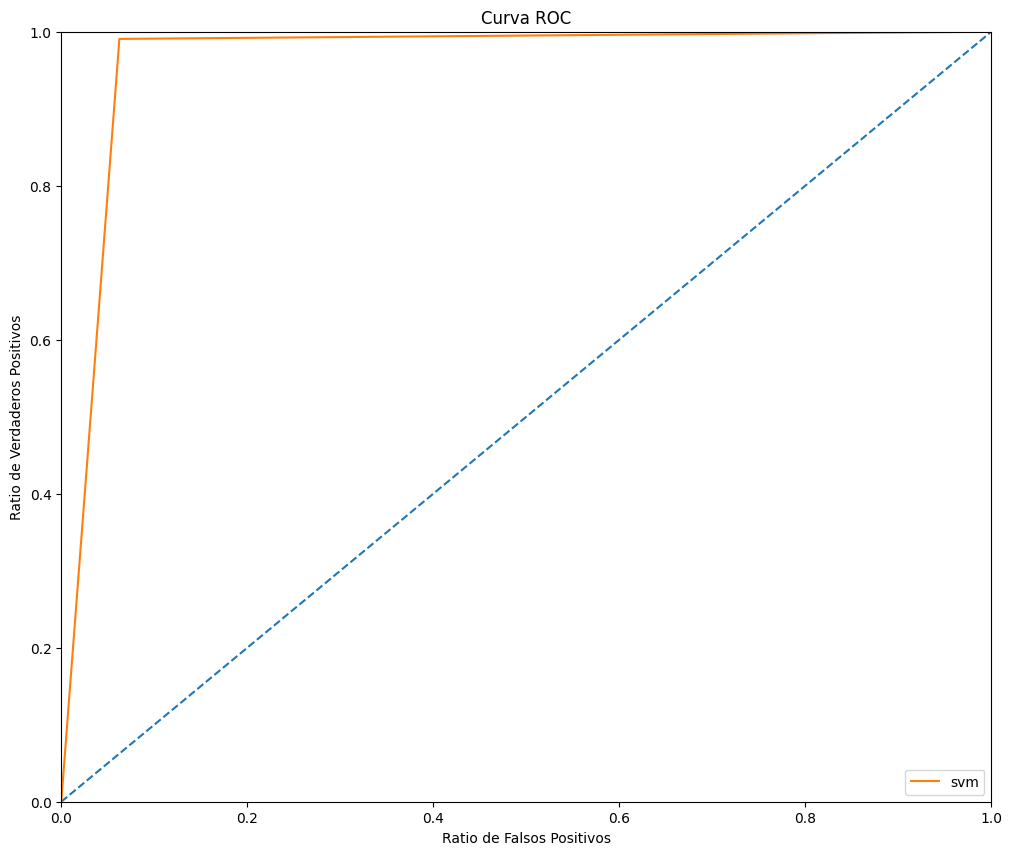

In [8]:
import matplotlib.pyplot as plt

# Creamos la figura que contendrá la curva ROC
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Conectar las diagonales
ax.plot([0, 1], [0, 1], ls="--")

# Establecer los ejes
ax.set_xlabel('Ratio de Falsos Positivos')
ax.set_ylabel('Ratio de Verdaderos Positivos')
ax.set_title('Curva ROC')

# Establecemos los límites del grafo
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintamos el grafo
ax.plot(fpr_svm, tpr_svm, label = "svm")

# Añadimos la leyenda
ax.legend(loc="lower right")
plt.show()

### Ejercicio
Para el conjunto de datos data.csv disponible en el campus virtual, ajustar los siguientes modelos de clasificación: Random Forest, Gradient Boosting, Extra Trees, KNN, Árboles de Decisión y SVM. Para cada uno de ellos, obtén las métricas de anteriores y representa en la misma gráfica todas las curvas ROC. 
¿Cuál es el mejor modelo?

NOTA: Analiza primero el conjunto de datos y preprocesa lo que consideres conveniente. 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier